# Task 2: Diffusion Maps
### Part one: Use the algorithm to demonstrate the similarity of Diﬀusion Maps and Fourier analysis. To do this, compute ﬁve eigenfunctions $\phi_l$ associated to the largest eigenvalues $\lambda_l$ with Diﬀusion Maps, on a periodic data set with N = 1000 points given by
### $X = \begin{Bmatrix} x_k \in \mathbb{R}^2\end{Bmatrix}_{k=1}^{N}, x_k =(cos(t_k), sin(t_k)),t_k=(2\pi k)/(N+1)$
### Plot the values of the eigenfunctions $\Phi_l(x_k)$ against $t_k$.

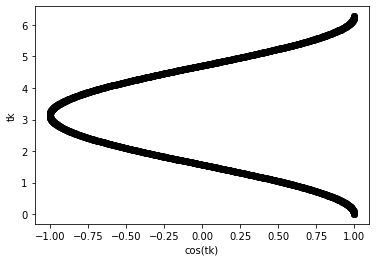

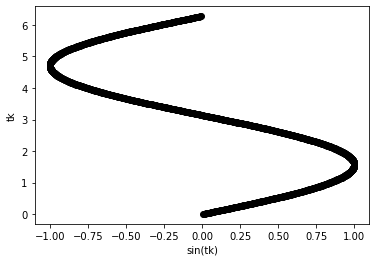

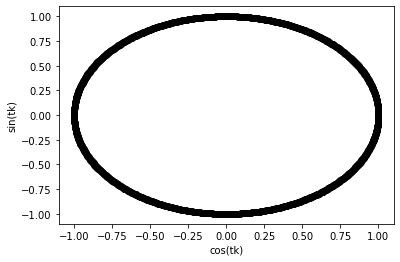

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

def create_diffusion_map(X, L):
    #Step 1
    N = X.shape[0]
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = (X[i] - X[j])
            D[i][j] = math.sqrt(np.sum(distance * distance))
    #Step 2
    epsilon = 0.05 * np.max(D)
    #Step 3
    W = np.exp(-np.power(D, 2)/epsilon)
    #Step 4
    P = np.zeros((N, N))
    for i in range(N):
        P[i,i] = np.sum(W[i])
    #Step 5
    inv_P = LA.inv(P)
    K = inv_P.dot(W.dot(inv_P))
    #Step 6
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i,i] = np.sum(K[i])
    #Step 7
    inv_Q_sqrt = np.sqrt(LA.inv(Q))
    T = inv_Q_sqrt.dot(K.dot(inv_Q_sqrt))
    #Step 8
    a, v = eigsh(T,k=L+1)
    #Step 9
    _lambda = np.sqrt(np.power(a, 1/epsilon))
    #Step 10
    _phi = inv_Q_sqrt.dot(v)
    return _lambda, _phi

def tk(k, N):
    return (2*math.pi*k) / (N+1)

N = 1000
X = np.zeros((N,2))
tk_arr = np.zeros(N)
for i in range(N):
    k = i+1
    tk_arr[i] = tk(k,N)
    X[i] = (math.cos(tk_arr[i]),math.sin(tk_arr[i]))
    
plt.plot(X[:,0], tk_arr, 'o', color='black');
plt.xlabel("cos(tk)")
plt.ylabel("tk")
plt.show()
plt.plot(X[:,1], tk_arr, 'o', color='black');
plt.xlabel("sin(tk)")
plt.ylabel("tk")
plt.show()
plt.plot(X[:,0], X[:,1], 'o', color='black');
plt.xlabel("cos(tk)")
plt.ylabel("sin(tk)")
plt.show()

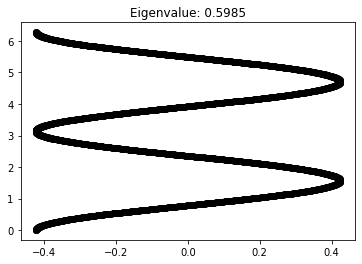

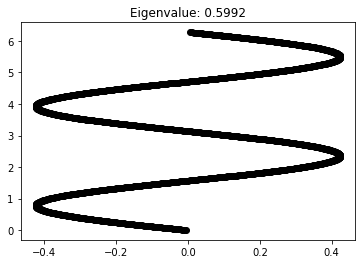

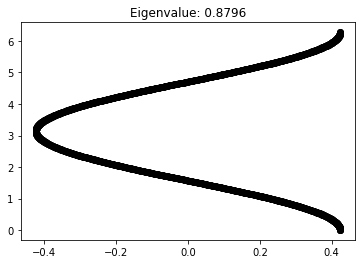

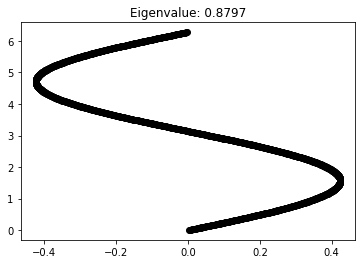

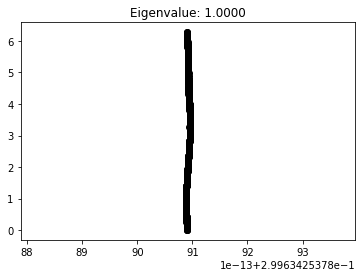

In [16]:
_lambda, _phi = create_diffusion_map(X, 4)
for i in range(_lambda.shape[0]):
    plt.title(f"Eigenvalue: {_lambda[i]:.4f}")
    plt.plot(_phi[:,i], tk_arr, 'o', color='black');
    plt.show()

### Part two: Use the algorithm to obtain the ﬁrst ten eigenfunctions of the Laplace Beltrami operator on the “swiss roll” manifold, deﬁned through
### $X = \begin{Bmatrix} x_k \in \mathbb{R}^3\end{Bmatrix}_{k=1}^{N}, x_k =(u cos(u), v, u sin(u))$

### Use the Diﬀusion Map algorithm to obtain approximations of the eigenfunctions, and plot the ﬁrst non-constant eigenfunction $\phi_1$ against the other eigenfunctions in 2D plots (the function $\phi_1$ on the horizontal axis). At what value of l is $\phi_l$, l > 1 no longer a function of $\phi_1$?

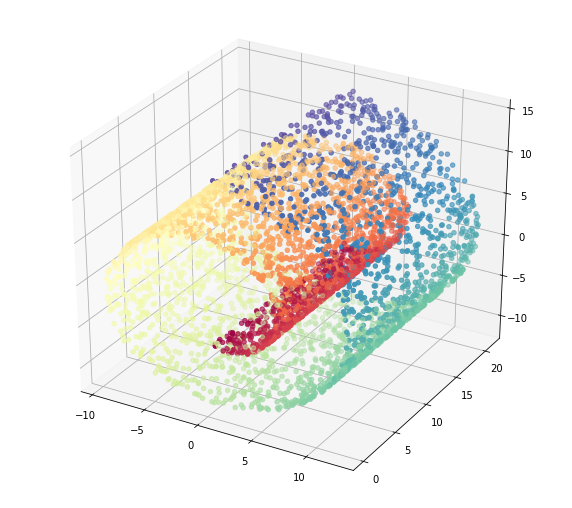

In [17]:
def create_diffusion_map(X, L):
    #Step 1
    N = X.shape[0]
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = (X[i] - X[j])
            D[i][j] = math.sqrt(np.sum(distance * distance))
    #Step 2
    epsilon = 0.05 * np.max(D)
    #Step 3
    W = np.exp(-np.power(D, 2)/epsilon)
    #Step 4
    P = np.zeros((N, N))
    for i in range(N):
        P[i,i] = np.sum(W[i])
    #Step 5
    inv_P = LA.inv(P)
    K = inv_P.dot(W.dot(inv_P))
    #Step 6
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i,i] = np.sum(K[i])
    #Step 7
    inv_Q_sqrt = np.sqrt(LA.inv(Q))
    T = inv_Q_sqrt.dot(K.dot(inv_Q_sqrt))
    #Step 8
    a, v = eigsh(T,k=L+1)
    #Step 9
    _lambda = np.sqrt(np.power(a, 1/epsilon))
    #Step 10
    _phi = inv_Q_sqrt.dot(v)
    return _lambda, _phi
N = 5000
X, color = make_swiss_roll(N)
fig = plt.figure(figsize=(10, 20))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

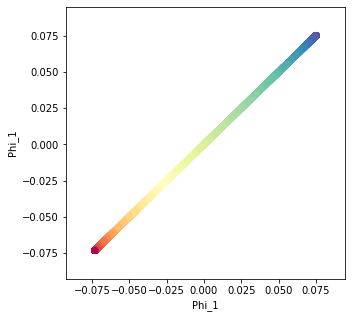

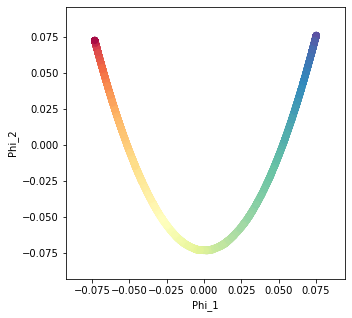

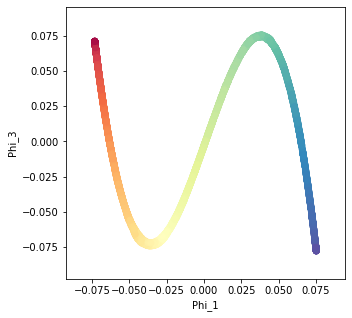

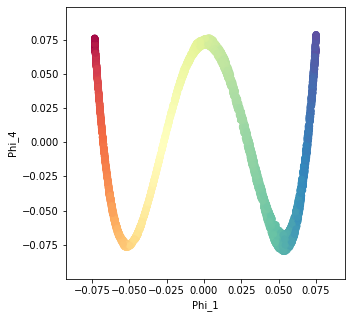

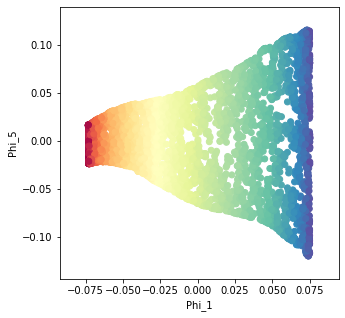

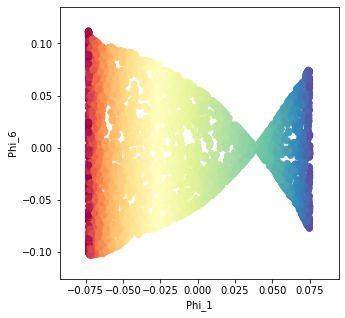

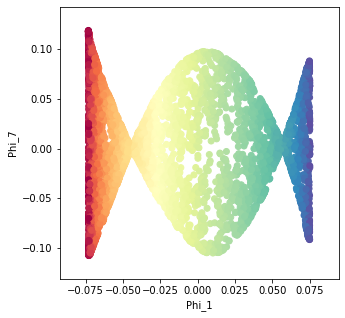

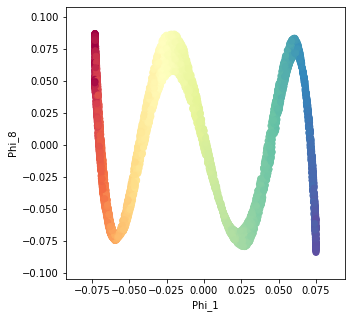

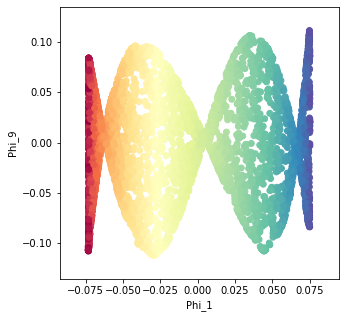

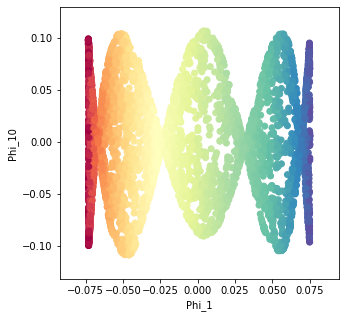

In [18]:
_lambda, _phi = create_diffusion_map(X, 10)
first_non_constant_eigenfunction = _phi[:,-2]
for i in range(10):
    index = -2 - i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(first_non_constant_eigenfunction, _phi[:,index], c=color, cmap=plt.cm.Spectral)
    plt.xlabel("Phi_1")
    plt.ylabel(f"Phi_{i + 1}")

### Compute the three principal components of the swiss-roll dataset. Why is it impossible to only use two principal components to represent the data? 

In [19]:
def calculate_pca(data, pc_count):
    U, S, Vt = linalg.svd(data)

    U = U[:, 0:pc_count]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = data.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_data= np.dot(U, np.dot(sigma, Vt))

    print(f"Explained Variance Ratio: {pca_variance_ratio[0:pc_count]}")
    print(f"Sum of Explained Variance ratios (Total Energy Captured): {np.sum(pca_variance_ratio[0:pc_count])}")
    
    return reconstructed_data

calculate_pca(X, 3)

Explained Variance Ratio: [0.28417064 0.39171504 0.32411432]
Sum of Explained Variance ratios (Total Energy Captured): 0.9999999999999998


array([[ -3.15421818,   1.68043032,   7.61939957],
       [  2.57642831,  18.1437319 ,  -4.54876427],
       [  2.11068323,  15.25531408, -10.98446451],
       ...,
       [  0.97421642,  20.18846224,  -4.81446653],
       [ -5.47404955,  18.03958329,  -8.8943346 ],
       [ 10.46337981,   8.75494529,   8.08712162]])

Explained Variance Ratio: [0.28417064 0.39171504]
Sum of Explained Variance ratios (Total Energy Captured): 0.6758856784880951


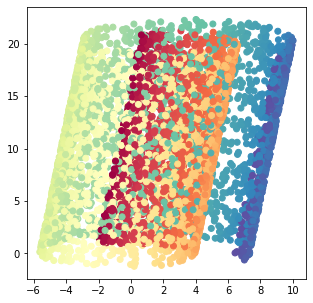

In [20]:
reconstructed_data = calculate_pca(X, 2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=color, cmap=plt.cm.Spectral)

### What happens if only 1000 data points are used?

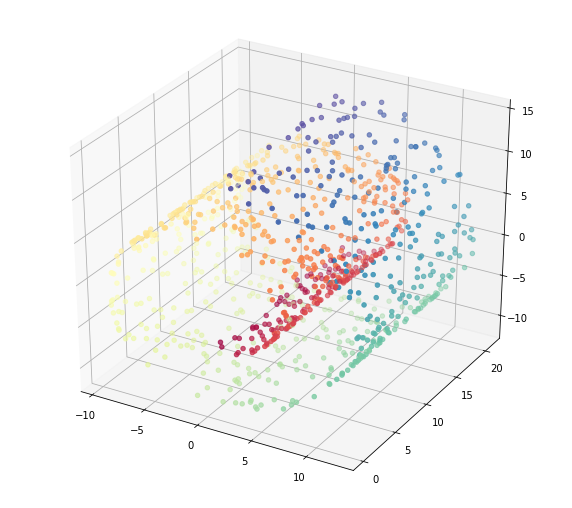

In [21]:
N2 = 1000
X_1000, color_1000 = make_swiss_roll(N2)
fig = plt.figure(figsize=(10, 20))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_1000[:, 0], X_1000[:, 1], X_1000[:, 2], c=color_1000, cmap=plt.cm.Spectral)

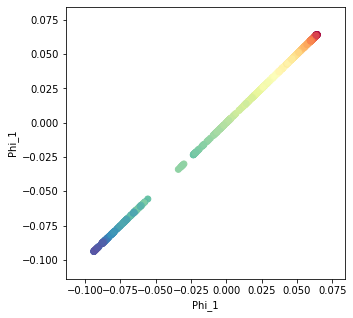

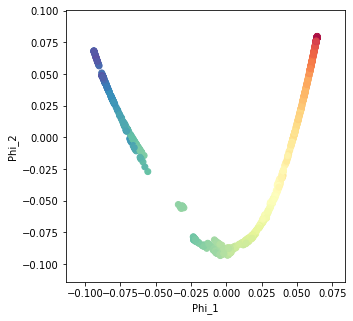

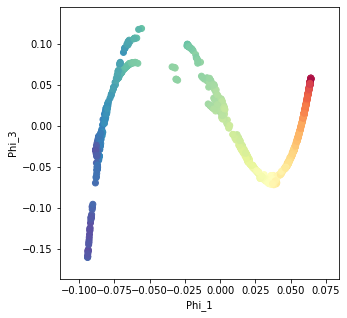

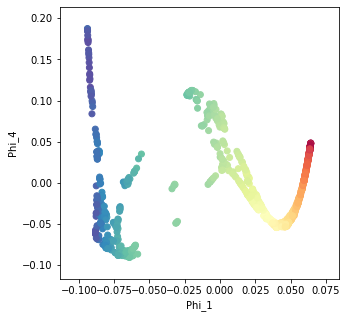

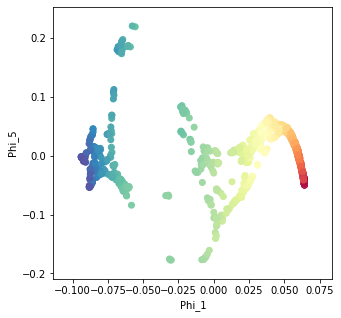

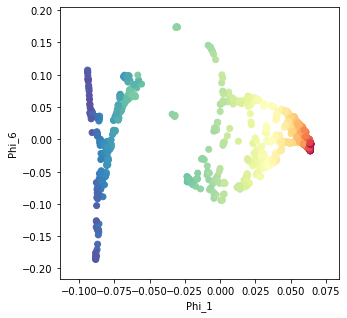

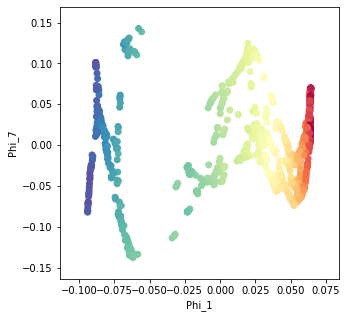

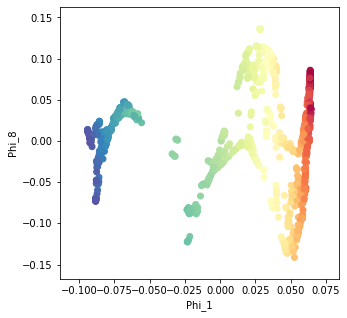

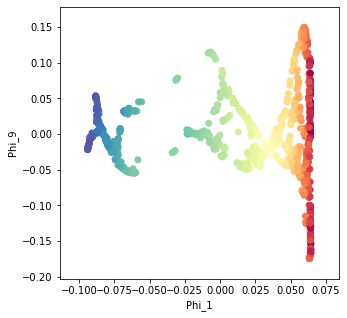

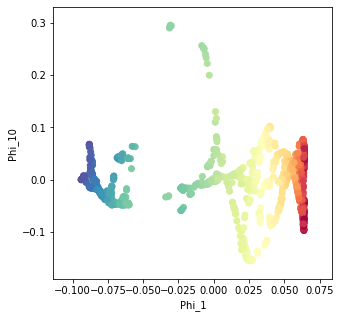

In [22]:
_lambda_1000, _phi_1000 = create_diffusion_map(X_1000, 10)
first_non_constant_eigenfunction_1000 = _phi_1000[:,-2]
for i in range(10):
    index = -2 - i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(first_non_constant_eigenfunction_1000, _phi_1000[:,index], c=color_1000, cmap=plt.cm.Spectral)
    plt.xlabel("Phi_1")
    plt.ylabel(f"Phi_{i + 1}")

Explained Variance Ratio: [0.28943937 0.39557363]
Sum of Explained Variance ratios (Total Energy Captured): 0.6850129928677837


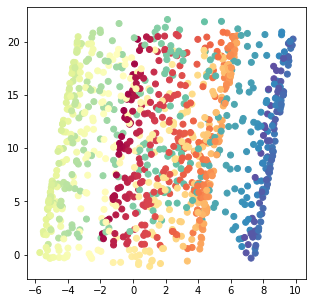

In [23]:
reconstructed_data = calculate_pca(X_1000, 2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=color_1000, cmap=plt.cm.Spectral)

### Part three of this task again concerns the trajectory data in the ﬁle data DMAP PCA vadere.txt on Moodle. Perform the same analysis you did with PCA.

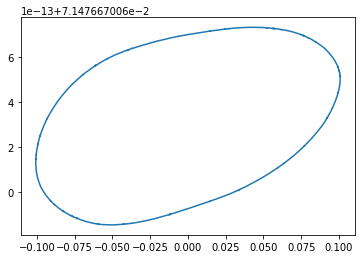

In [24]:
X = np.genfromtxt("data_DMAP_PCA_vadere.txt", dtype='double')
_lambda_1, _phi_1 = create_diffusion_map(X, 1)
empty_array = np.zeros(1000)
for i in range(1000):
    empty_array[i] = i
plt.plot(_phi_1[:,0], _phi_1[:,1]);
plt.show()

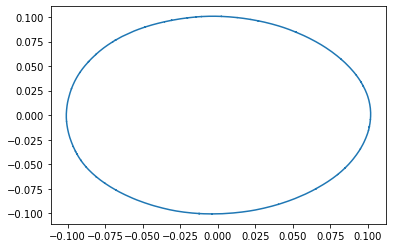

In [13]:
_lambda_2, _phi_2 = create_diffusion_map(X, 2)
empty_array = np.zeros(1000)
for i in range(1000):
    empty_array[i] = i
plt.plot(_phi_2[:,0], _phi_2[:,1]);
plt.show()

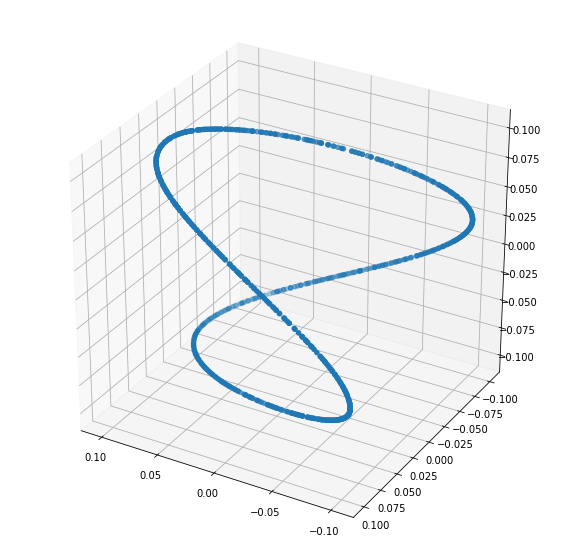

In [14]:
_lambda_3, _phi_3 = create_diffusion_map(X, 3)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(_phi_3[:, 0], _phi_3[:, 1], _phi_3[:, 2])
ax.view_init(30, 120)

### Bonus (5): Download and install the datafold software, compute eigenvectors of the swiss roll data set (see part two) and plot them against each other.

In [2]:
import copy

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import sklearn.manifold as manifold
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.decomposition import PCA

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

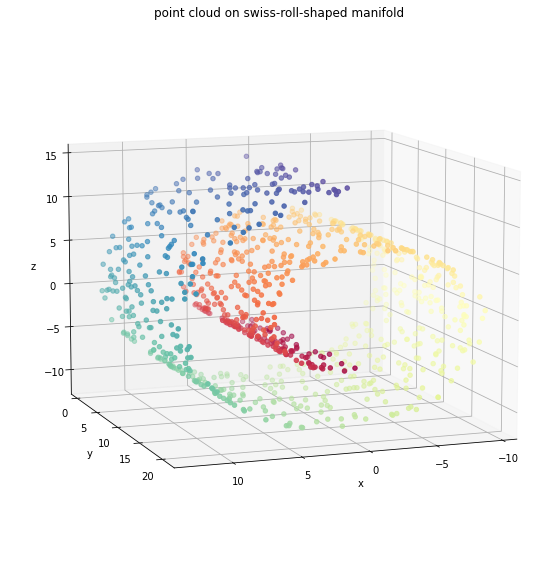

In [3]:
nr_samples = 15000

# reduce number of points for plotting
nr_samples_plot = 1000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on swiss-roll-shaped manifold")
ax.view_init(10, 70)

In [4]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.212929447981997, cut-off=1.9804810986884929


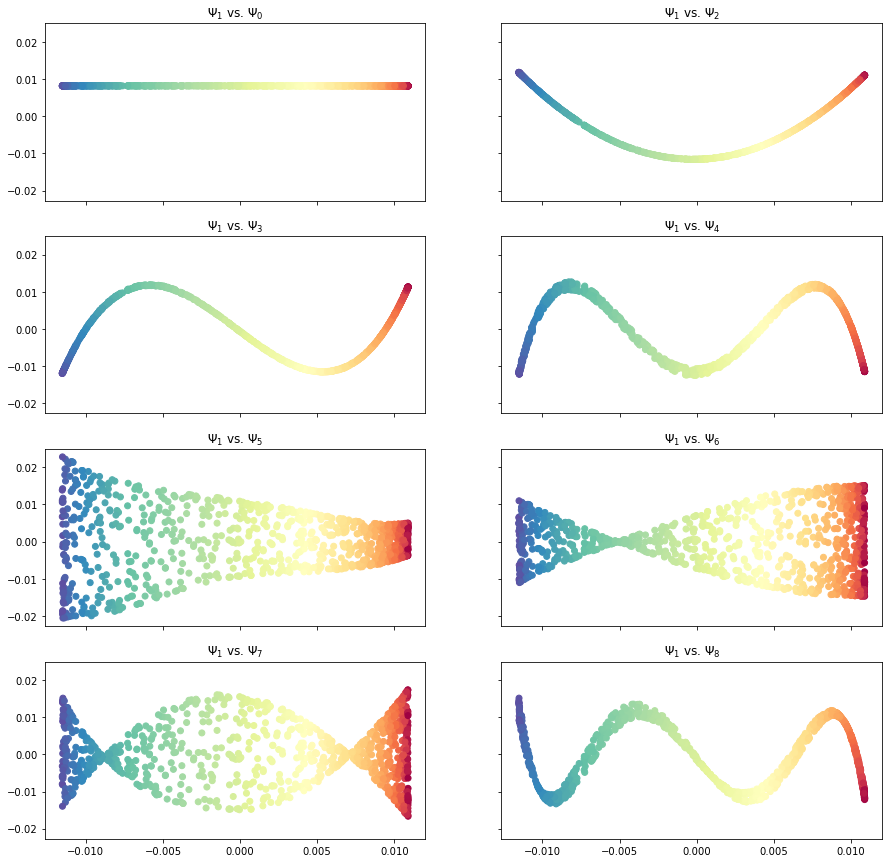

In [5]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)
